In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
from scipy.optimize import curve_fit
font = {'family' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [3]:
def M(U):
    q = (0.9/10000) 
    ns = 17
    mu0 = 1.25663706212e-6
    #todo: den wert iwie halbieren
    return U/(47 *4* 1/(20e-3) * ns * mu0 * q)
def H(Im,Um,U):
    np = 54
    r = 1.5e-2
    u = 2*r*3.14
    L = u
    return np/L * Im/Um * U
def H_old(Im,Um,U):
    np = 17
    r = 1.5e-2
    u = 2*r*3.14
    L = u
    return np/L * Im/Um * U
def Ntheo(d):
    r = 1.5e-2
    return d/(np.pi*r + d)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


======= 0,94A_kenn =====
Koerzitivmagnetisierung: 73.42
Remanenzmagnetisierung: 5.32 e4
Maximale Magnetisierung 16.73 e4
======= 3A =====
Koerzitivmagnetisierung: 5.59
Remanenzmagnetisierung: 10.3 e4
Maximale Magnetisierung 30.38 e4


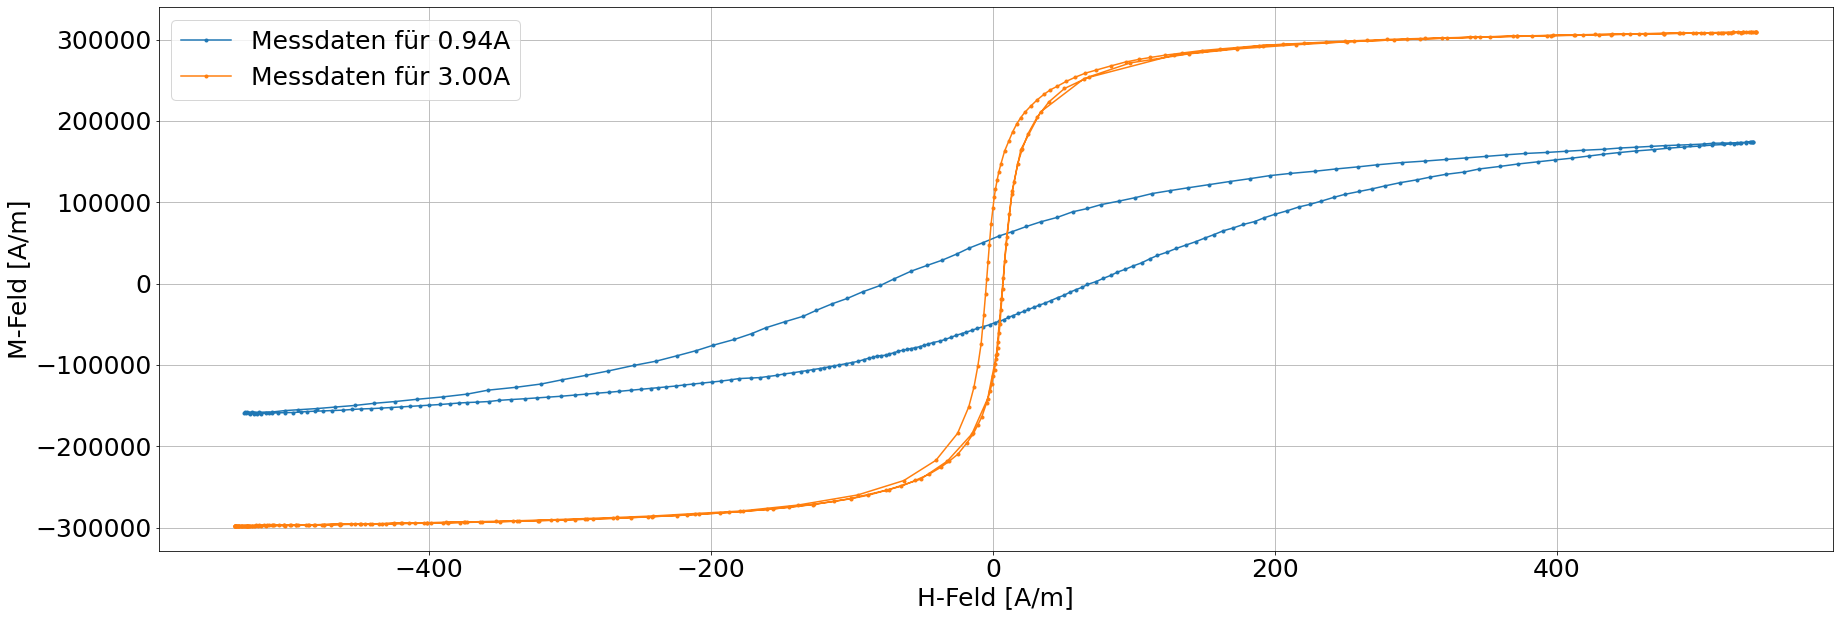

In [4]:
plt.figure(figsize=(30,10))
for name in os.listdir("Daten asim"):
    if not("0,94A_kenn" == name or "3A" == name):
        continue

    Im =float(name.split("A")[0].replace(",","."))
    
   
    file = open("Daten asim/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    #plt.xlim(-0.25,0.25)
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0]))
        yv.append(M(float(vals[1])))
    xv = np.array(xv)
    Um = max(xv)
    if "3A" in name:
        xv = H_old(Im,Um,xv)
    else:
        xv = H(Im,Um,xv)
    xv = list(xv)

    
    plt.plot(xv,yv,marker=".",label="Messdaten für %.2fA"%(Im))
    plt.xlabel("H-Feld [A/m]")
    plt.ylabel("M-Feld [A/m]")
    plt.legend()
    file.close()
    

    x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]
    x_yg0 = [x for i,x in enumerate(xv) if yv[i] > 0]
    
    y_xs0 = [y for i,y in enumerate(yv) if xv[i] < 0]
    y_xg0 = [y for i,y in enumerate(yv) if xv[i] > 0]
    
    print("=======",name,"=====")
    #print("Koerzitivmagnetisierung:",y_xs0)
    try:

        print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
    except:
        try:

            print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
        except:
            try:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
            except:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
    
    try:
        print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    except:
        try:
            print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
        except:
            try:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
            except:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    print("Maximale Magnetisierung",round(1/2*(abs(min(yv))+max(yv))/10000,2),"e4")
    
    x_abs = abs(np.array(xv))
    y_abs = abs(np.array(yv))
    #plt.plot([0,0],[min(yv),max(yv)],color="green")
    #plt.plot([min(xv),max(xv)],[0,0],color="green")
    #plt.title(name)
    plt.grid(True)
plt.savefig("..\..\Images\Teil4.1.png")

0.83
0.54
1.02
1.45
2.1
3.0


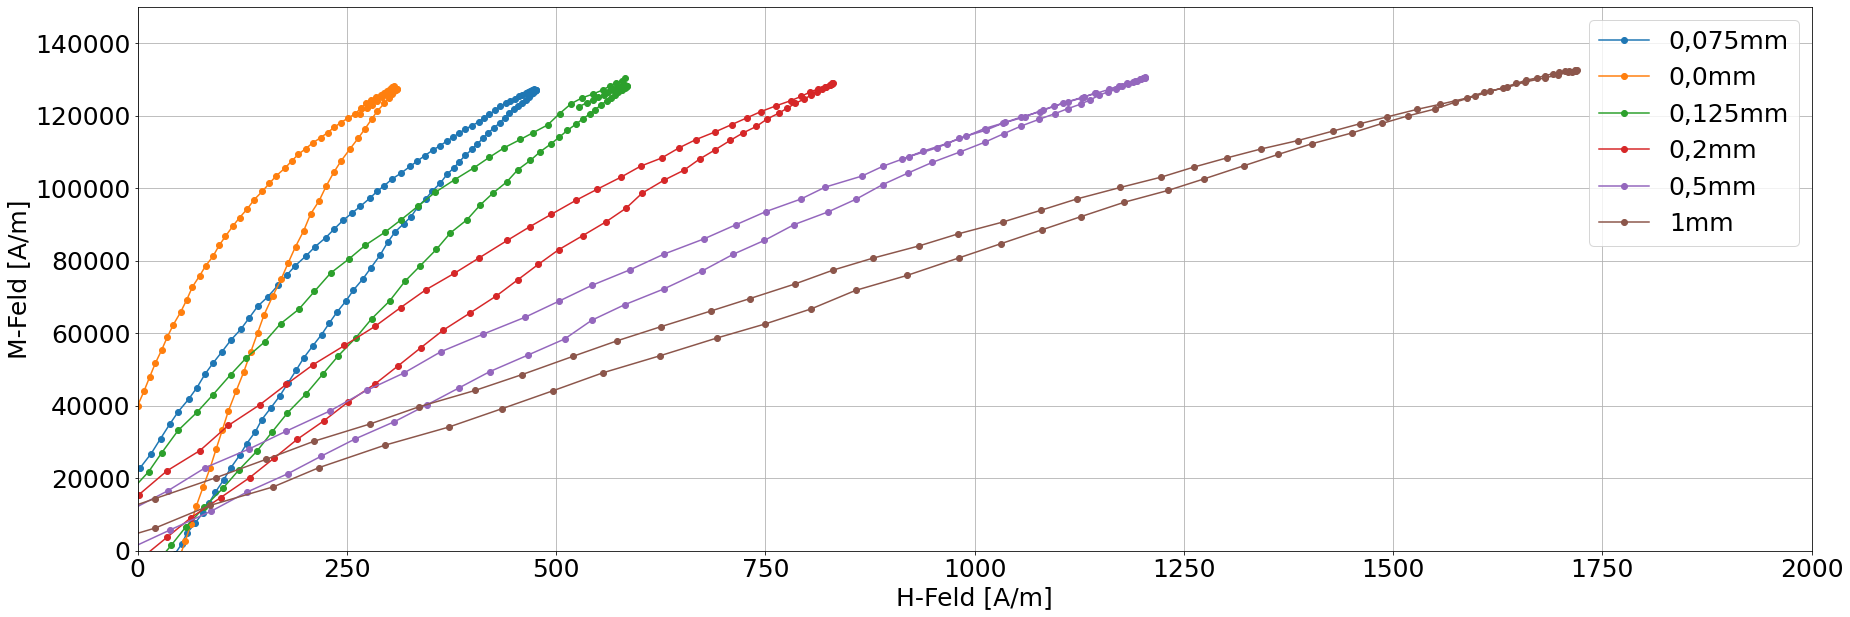

In [6]:
Ns = []
Nt = []
sb = []
ref = 0
Hmax = []
Mmax = []

plt.figure(figsize=(30,10))
for name in os.listdir("Daten asim"):
    
    if not("mm" in name):
        continue
    #Im = 0.94
    Im = float(name.replace(",",".").split(" ")[-1][:-1])

    file = open("Daten asim/"+name)
    lines = file.readlines()
    xv,yv = [],[]

    for i,line in enumerate(lines):
        if i < 3:
            continue
        vals = line[:-1].split("\t")
        xv.append((float(vals[0])))
        yv.append(M(float(vals[1])))
    xv = np.array(xv)
    Um = max(xv)
    xv = H(Im,Um,xv)
    plt.plot(xv,yv,label=name.split(" ")[0],marker="o")
    plt.xlabel("H-Feld [A/m]")
    plt.ylabel("M-Feld [A/m]")
    plt.legend()
    file.close()
    plt.xlim(0,2000)
    plt.ylim(0,150000)
    plt.grid(True)
    print(Im)
    Mmax.append(max(yv))
    Hmax.append(max(xv))
    if "0mm" in name:
        ref = max(xv)
    sb.append(float(name.split(" ")[0][:-2].replace(",",".")))
plt.savefig("..\..\Images\Teil4.2.png")

In [44]:
Ns = []
Nt = []
Ns_err = []
median_Mmax = np.median(Mmax)
temp = 0
for i in Mmax:
    temp += (i-median_Mmax)**2
median_Mmax_err = np.sqrt(temp/30)
#print(median_Mmax,median_Mmax_err)

for i in range(len(Hmax)):
    Ns_err.append((Hmax[i]-ref)/median_Mmax**2 * median_Mmax_err)
    #print(ref,Hmax[i])
    Ns.append((Hmax[i]-ref)/median_Mmax)
for i in sb:
    Nt.append(Ntheo(i*1e-3))
print(Ns, Ns_err)

[0.0012806670746092097, 0.0, 0.002119724813146279, 0.004018644958256487, 0.0068891056427254046, 0.010863589667374678] [7.774399061768226e-06, 0.0, 1.2867970860857757e-05, 2.439552809037617e-05, 4.1820905297787706e-05, 6.5948350661896e-05]


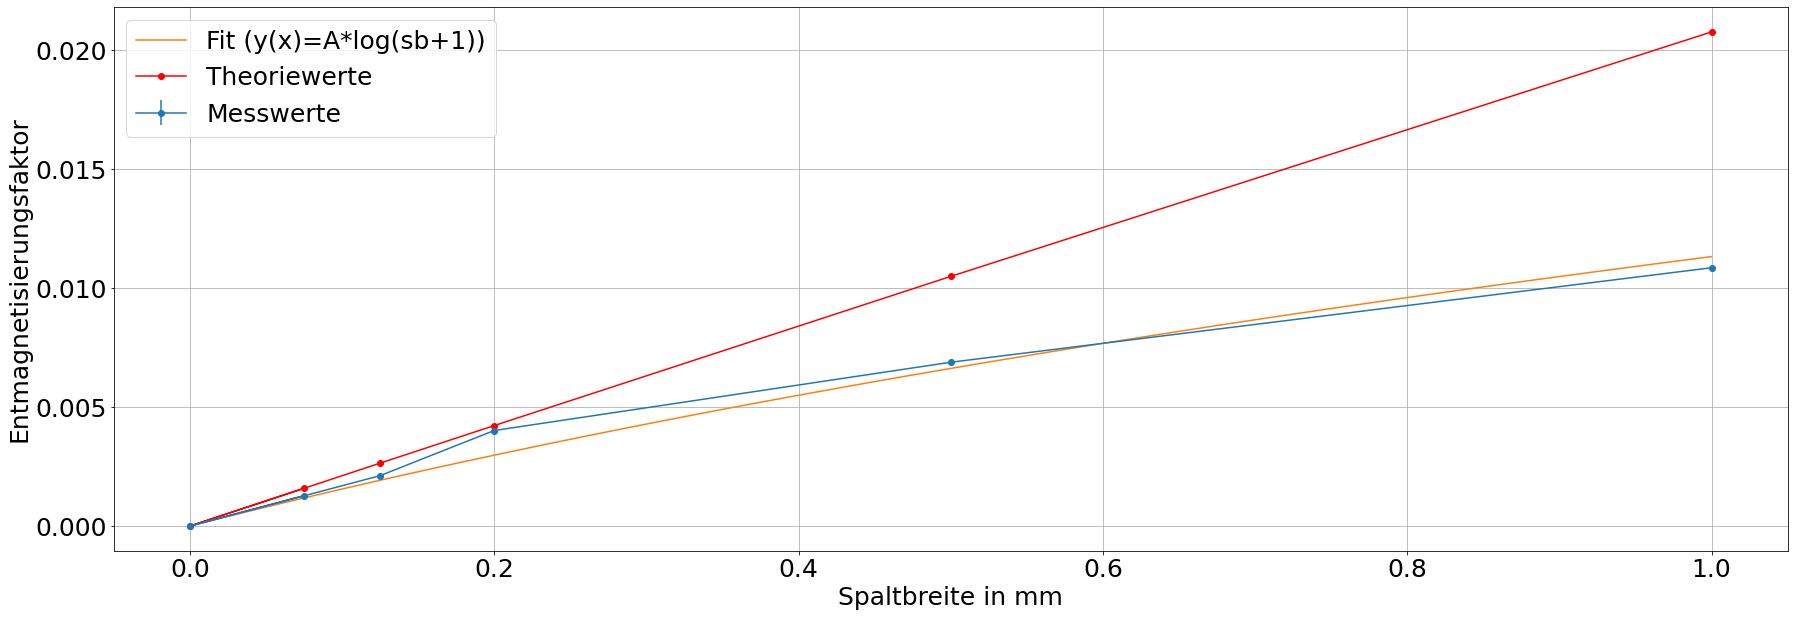

In [68]:
def timons_faviourite_fit_function_des_todes_grauens_punkt_pdf(x,A):
    return A*np.log(x+1)

popt,_ = curve_fit(timons_faviourite_fit_function_des_todes_grauens_punkt_pdf,sb,Ns)


fig = plt.figure(figsize=(30,10))
plt.errorbar(sb,Ns, yerr = Ns_err, marker="o",linestyle="-", label="Messwerte")
plt.plot(np.linspace(0,1,100),[timons_faviourite_fit_function_des_todes_grauens_punkt_pdf(x,*popt) for x in np.linspace(0,1,100)], label="Fit (y(x)=A*log(sb+1))")
plt.plot(sb,Nt,marker="o", color = "red", label="Theoriewerte")
plt.xlabel("Spaltbreite in mm")
plt.ylabel("Entmagnetisierungsfaktor")
plt.grid(True)
plt.legend()
plt.savefig("..\..\Images\Teil4.2_Entmagnetisierungsfakoren.png")